In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier






In [4]:
data = pd.read_csv("adult.csv")

In [5]:
df = data.copy()

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
def clean_rows(df):
    for index, row in df.iterrows():
        for column in df.columns:
            if pd.isnull(row[column]):
                df.at[index, column] = ''
            elif isinstance(row[column], str):
                df.at[index, column] = row[column].strip().lower()
            else:
                df.at[index, column] = row[column]
    return df

In [10]:
df = clean_rows(df)

In [11]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,private,257302,assoc-acdm,12,married-civ-spouse,tech-support,wife,white,female,0,0,38,united-states,<=50k
32557,40,private,154374,hs-grad,9,married-civ-spouse,machine-op-inspct,husband,white,male,0,0,40,united-states,>50k
32558,58,private,151910,hs-grad,9,widowed,adm-clerical,unmarried,white,female,0,0,40,united-states,<=50k
32559,22,private,201490,hs-grad,9,never-married,adm-clerical,own-child,white,male,0,0,20,united-states,<=50k


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [13]:
def clean_strings(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip()
            df[col] = df[col].str.lower()
    return df
        

In [14]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,<=50k
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,<=50k
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,<=50k
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,<=50k
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,<=50k


In [15]:
#Encoding Salary column 
df['salary']= df['salary'].replace('<=50k',0)
df['salary']= df['salary'].replace('>50k',1)

In [16]:
#persons whose salary is lesser than 50k
df[df['salary']==0].shape

(24720, 15)

In [17]:
#persons whose salary is more than 50k
df[df['salary']==1].shape

(7841, 15)

In [18]:
#dropping the null values present in the columns
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [19]:
#no null value in dataset
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [20]:
##Finally we see that no null values are present 

In [21]:
#checking the persons working in all type of jobs

In [22]:
workclass_counts = df['workclass'].value_counts()

In [23]:
workclass_counts

private             22286
self-emp-not-inc     2499
local-gov            2067
state-gov            1279
self-emp-inc         1074
federal-gov           943
without-pay            14
Name: workclass, dtype: int64

Framing the graph based on the graph

In [24]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,0
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,0
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,0
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,0
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,0


In [25]:
male_salaries = list(df.loc[df['sex'] == 'male', 'salary'].to_frame(name='male_salaries'))
female_salaries = df.loc[df['sex'] == 'female', 'salary'].to_frame(name='female_salaries')

In [26]:
male_salaries = np.array(male_salaries)
female_salaries = np.array(female_salaries)

In [27]:
male_salaries = list[df.loc[df['sex'] == 'male', 'salary'].to_frame(name='male_salaries')]

In [28]:
female_salaries = df.loc[df['sex'] == 'female', 'salary'].to_frame(name='female_salaries')

<AxesSubplot:xlabel='salary'>

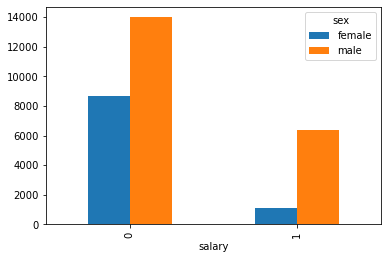

In [29]:
#cheacking male and female ration according to their salary
class_sex = pd.crosstab(df['salary'],df['sex'])
class_sex.plot(kind='bar')

In [30]:
#checking the distribution of no of workers in particular work class 

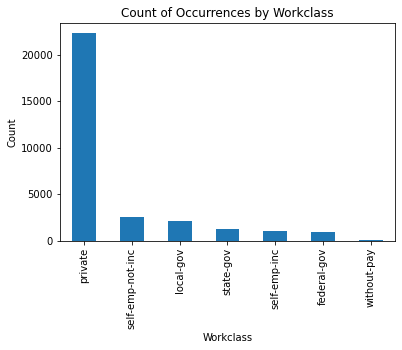

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
workclass_counts = df['workclass'].value_counts()
workclass_counts.plot(kind='bar')

plt.title('Count of Occurrences by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()

#from the above we can see that there are more private workers

In [32]:
#cheacking worlclass relation according to their salary

<AxesSubplot:xlabel='salary'>

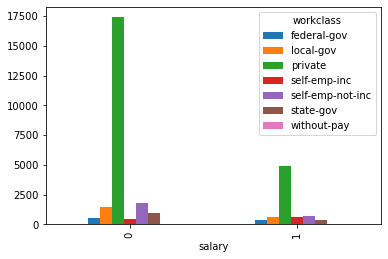

In [33]:
class_salary= pd.crosstab(df['salary'],df['workclass'])
class_salary.plot(kind='bar')

In [34]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,0
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,0


<AxesSubplot:xlabel='education'>

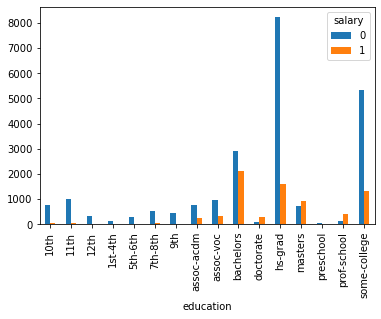

In [35]:
#checking distribution of people according to salary
salary_education = pd.crosstab(df['education'],df['salary'])
salary_education.plot(kind='bar')

In [36]:
#dropping the unnecessary columns

In [37]:
df = df.drop('race',axis = 1)
df = df.drop('fnlwgt',axis = 1)

In [38]:
num_col = []
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)
        

        

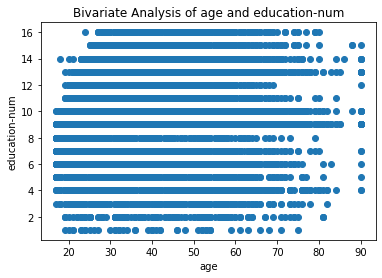

In [39]:
import pandas as pd
import matplotlib.pyplot as plt


x_col = 'age'
y_col = 'education-num'

# Create a scatter plot of the two columns
plt.scatter(df[x_col], df[y_col])

# Add axis labels and a title
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Bivariate Analysis of {} and {}'.format(x_col, y_col))

# Display the plot
plt.show()

In [40]:
#performing univariate analysis of numerical features

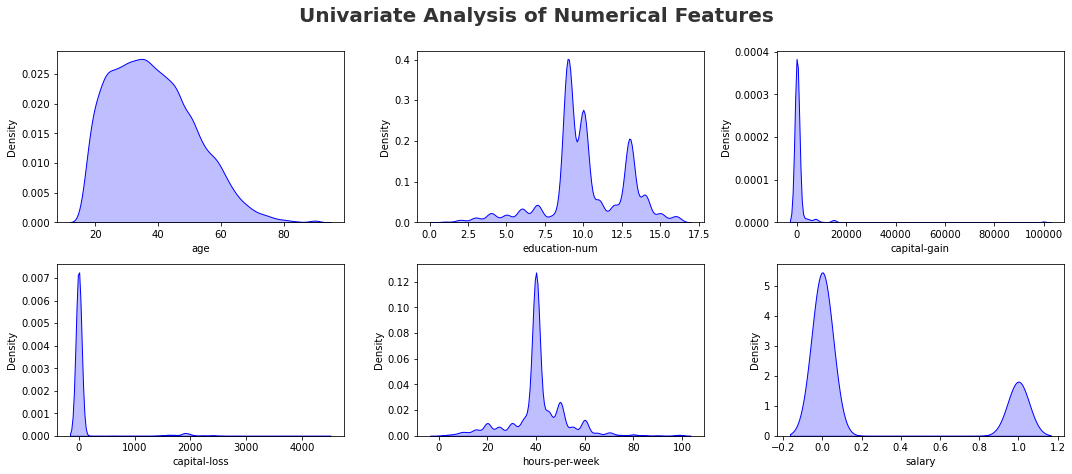

In [41]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [42]:
cat_col = []
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
cat_col[0:2]
        

['workclass', 'education']

<Figure size 432x288 with 0 Axes>

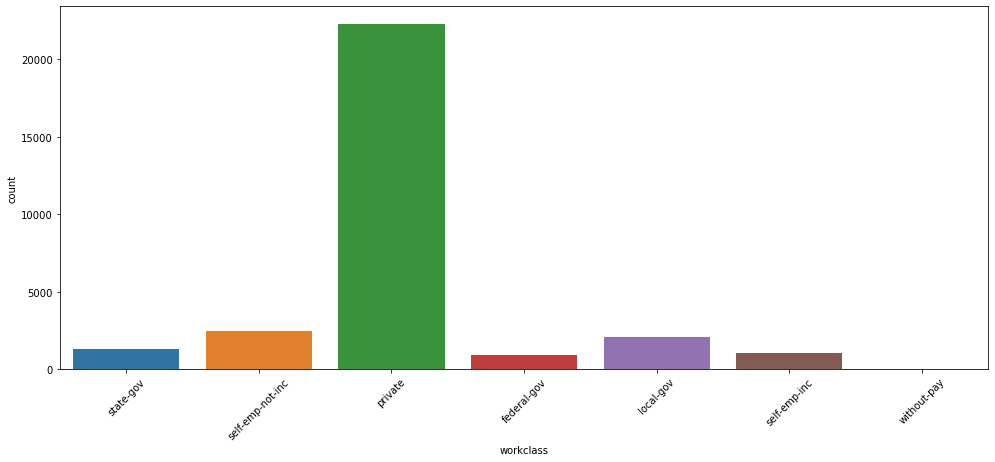

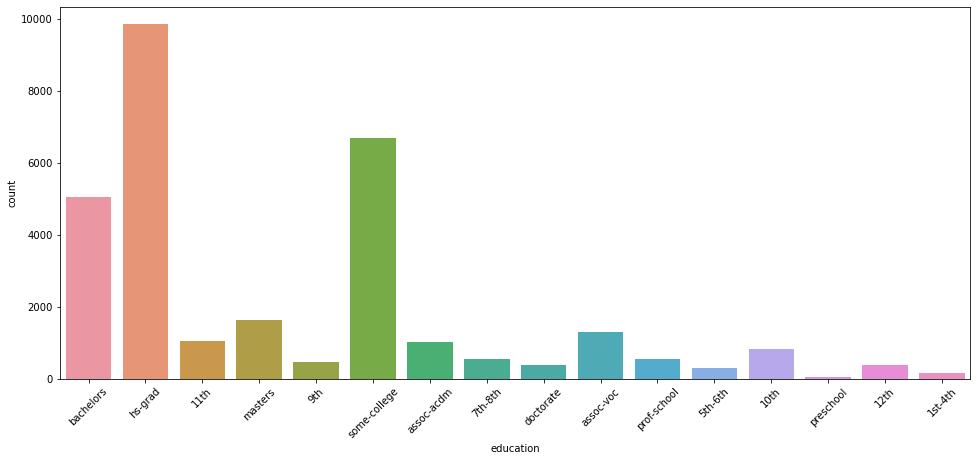

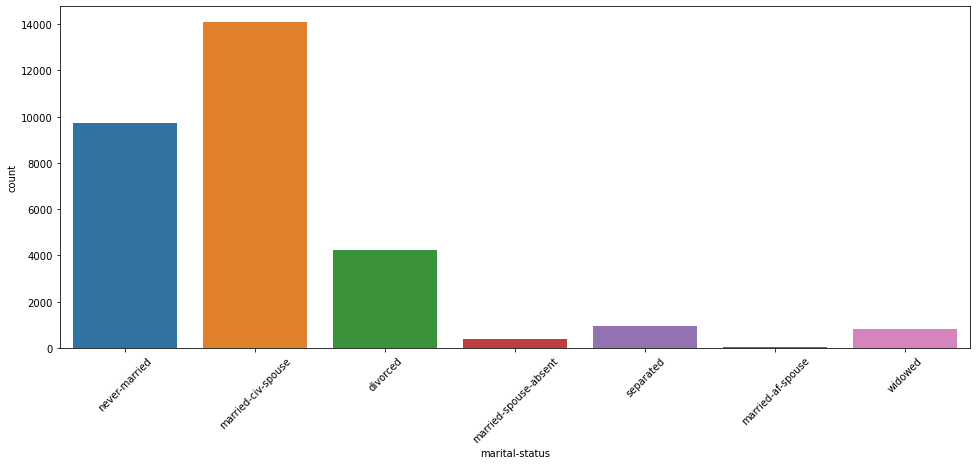

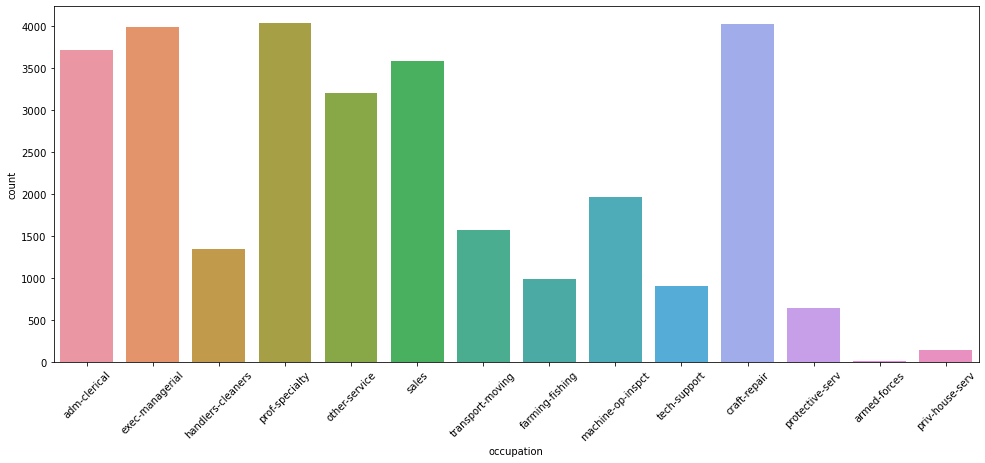

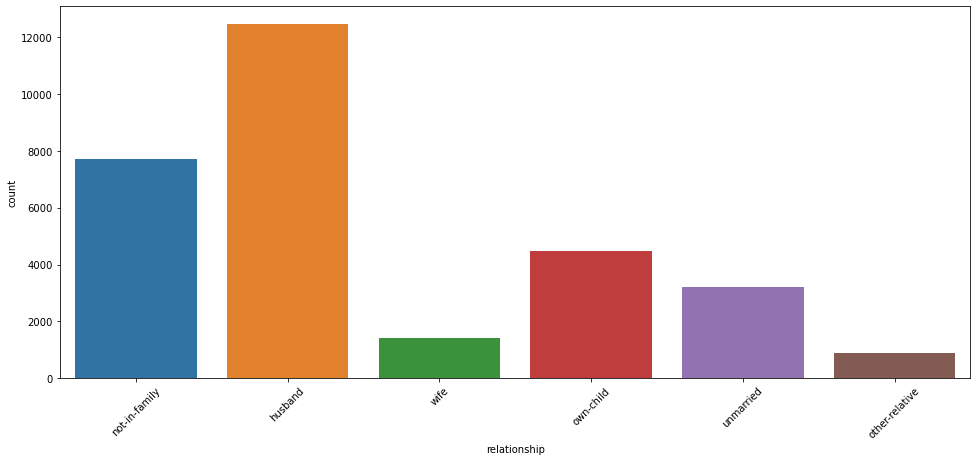

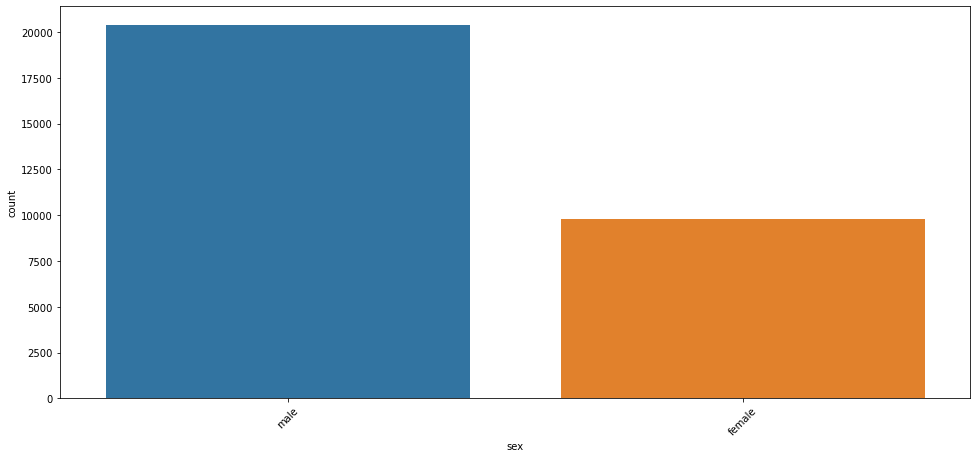

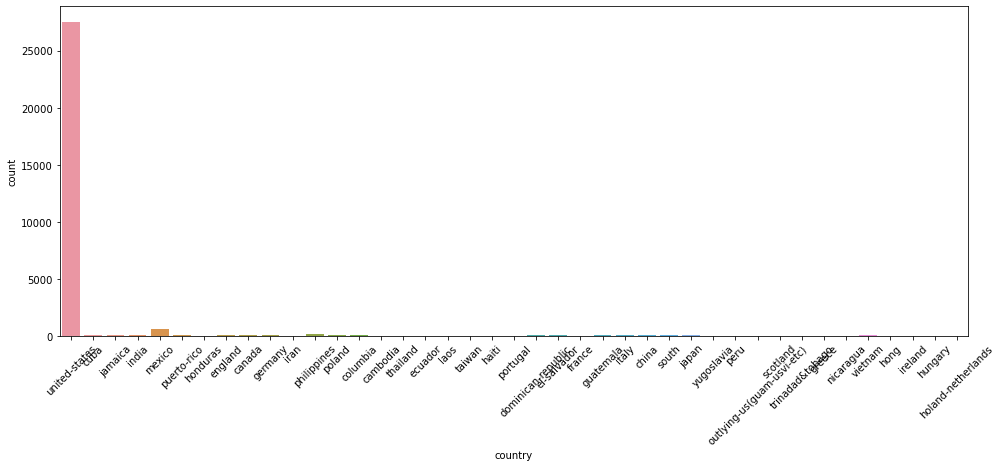

In [43]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Visualization of unique values in Target variable

minimum: 22654, Maximum: 7508


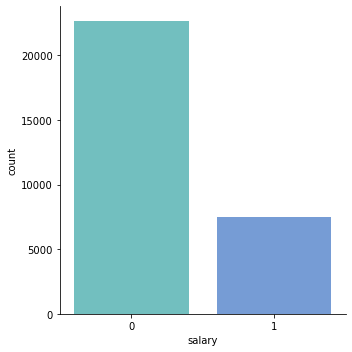

In [44]:
min = df[df['salary']==0].shape[0]
max = df[df['salary']==1].shape[0]
print("minimum: " + str(min) + ", Maximum: " + str(max))
sns.catplot(data=df, x="salary", kind="count", palette="winter_r", alpha=.6)
plt.show()

Plot distribution of all Independent Numerical variables

Check Multicollinearity in Numerical features

In [45]:
df[(list(df.columns)[1:])].corr()


,education-num,capital-gain,capital-loss,hours-per-week,salary
education-num,1.000000,0.124416,0.079646,0.152522,0.335286
capital-gain,0.124416,1.000000,-0.032229,0.080432,0.221196
capital-loss,0.079646,-0.032229,1.000000,0.052417,0.150053
hours-per-week,0.152522,0.080432,0.052417,1.000000,0.229480
salary,0.335286,0.221196,0.150053,0.229480,1.000000


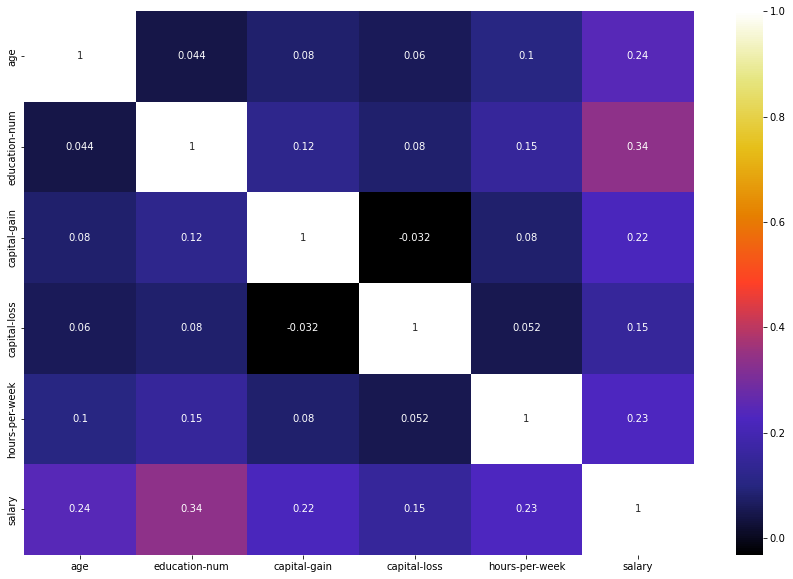

In [46]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

>so their is no multicollinearity in numeric feature
>Check Multicollinearity for Categorical features
>A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test >statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

>A chi-square statistic is one way to show a relationship between two categorical variables.

>Here we test correlation of Categorical columns with Target column i.e Salary

In [47]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['salary'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital-status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,sex,Reject Null Hypothesis
6,country,Reject Null Hypothesis


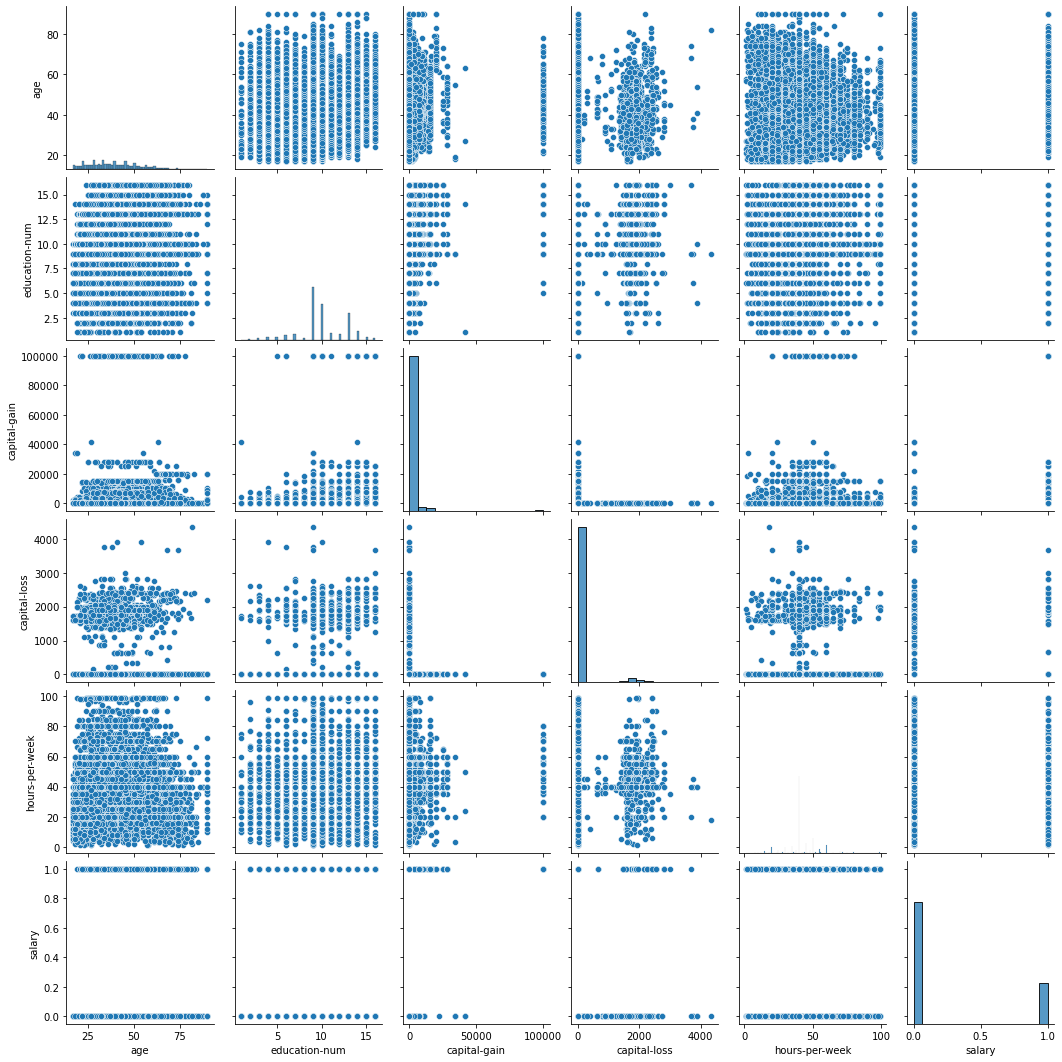

In [48]:
sns.pairplot(df[num_col])

CHECKING THE OUTLIERS

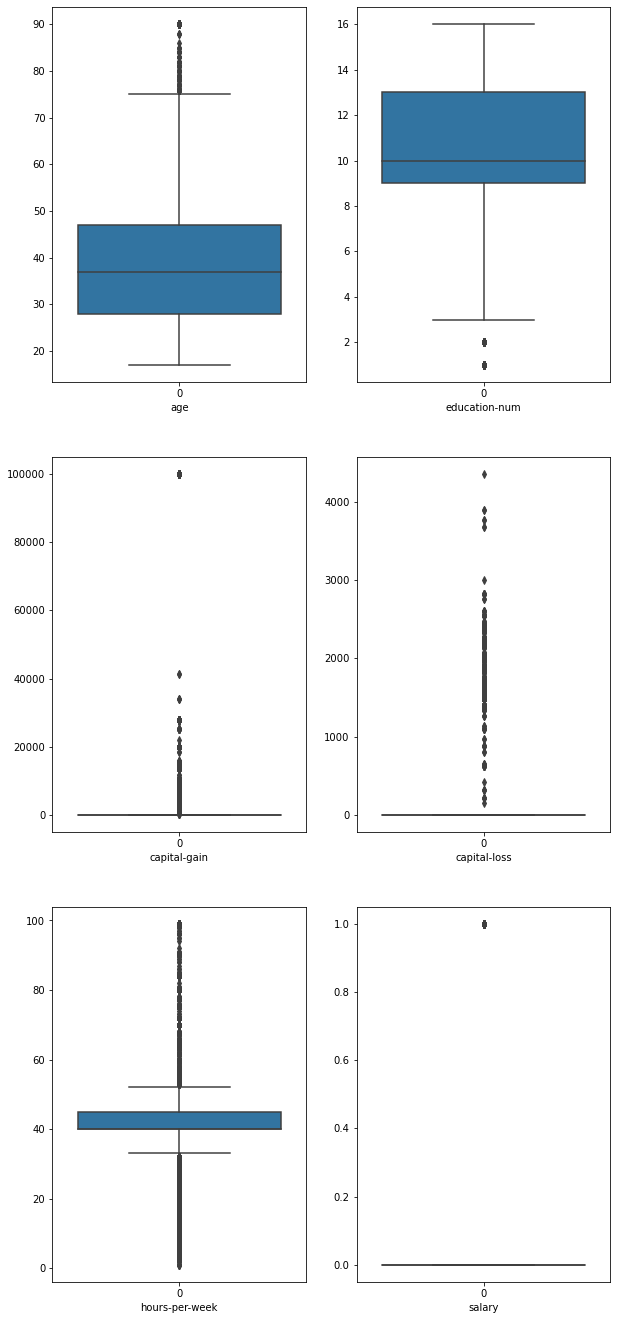

In [49]:
plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

In [50]:
#We see that there are many outliers in our dataset therefore we have to treat them before model building#

In [51]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()

In [52]:
replace_with_thresholds(df,num_col)

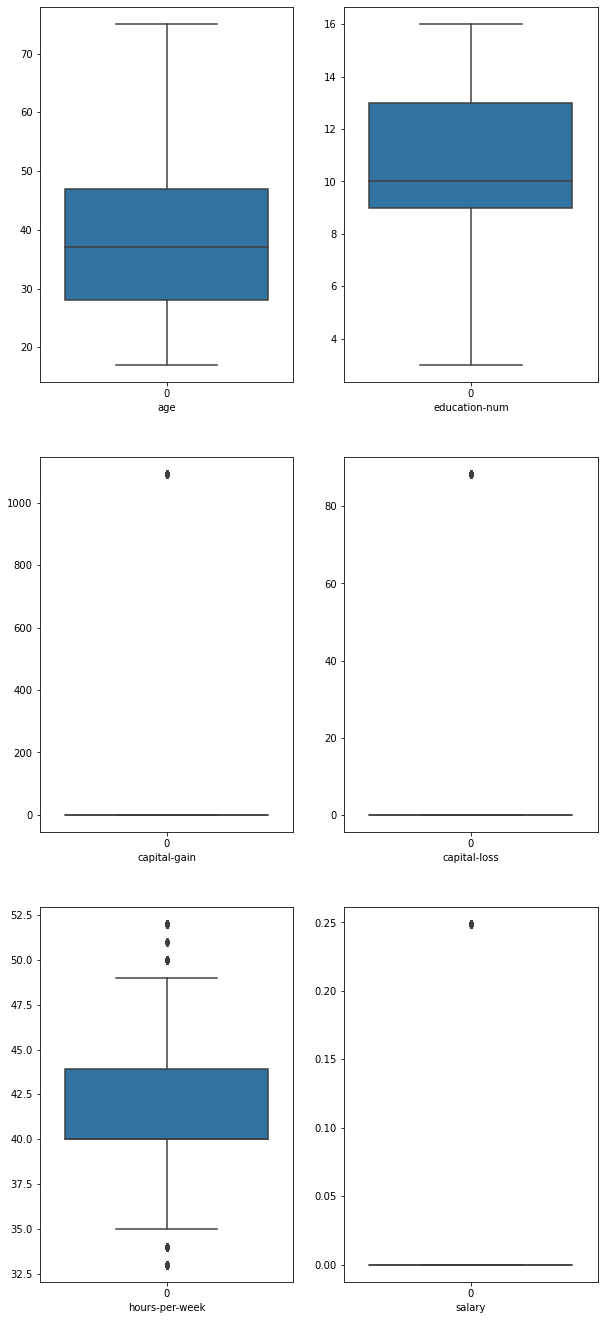

In [53]:

plt.figure(figsize=(10,40))
for i in range(0,len(num_col)):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data=df[num_col[i]])
    plt.xlabel(num_col[i])

In [54]:
ddf = df.copy()

In [55]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
#data.drop('salary',axis=1,inplace=True)

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]
data_categorical.head()


data_encoded = encoder.fit_transform(data_categorical)

a = pd.DataFrame(data_encoded,columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country','salary'])
b = data[['age','hours-per-week']]
#c=data['hours-per-week']
ddf = pd.concat([b,a],axis=1)

NOW WE ARE GOOD FOR MODEL BUILDING

In [56]:
#now we have to remove some unncecessry columns which is not requiered for model building

In [57]:
ddf.head(1)

,age,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,39,40,7.0,9.0,4.0,1.0,1.0,4.0,1.0,39.0,0.0


In [58]:
ddf = ddf.drop(['occupation'],axis = 1)

In [59]:
ddf.head(1)

,age,hours-per-week,workclass,education,marital-status,relationship,race,sex,country,salary
0,39,40,7.0,9.0,4.0,1.0,4.0,1.0,39.0,0.0


In [60]:
X = ddf.drop(['salary'],axis = 1)

In [61]:
y = ddf['salary']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [64]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.7633)
n_neighbors= 3 || accuracy (0.7633)
n_neighbors= 5 || accuracy (0.7633)
n_neighbors= 7 || accuracy (0.7633)
n_neighbors= 9 || accuracy (0.7633)


In [65]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [66]:
X_knn =knn_pipeline.fit_transform(X)

In [67]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

C:\Users\SudeepSN\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [68]:

# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [69]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [70]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [71]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [72]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9474
- F1 score: 0.9484
- Precision: 0.9289
- Recall: 0.9688
- Roc Auc Score: 0.9474
- COST: 313740.
----------------------------------
Model performance for Test set
- Accuracy: 0.8672
- F1 score: 0.8699
- Precision: 0.8588
- Recall: 0.8813
- Roc Auc Score: 0.8671
- COST: 294520.


Decision Tree
Model performance for Training set
- Accuracy: 0.9474
- F1 score: 0.9477
- Precision: 0.9411
- Recall: 0.9544
- Roc Auc Score: 0.9474
- COST: 449460.
----------------------------------
Model performance for Test set
- Accuracy: 0.8428
- F1 score: 0.8443
- Precision: 0.8424
- Recall: 0.8463
- Roc Auc Score: 0.8427
- COST: 380170.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8481
- F1 score: 0.8537
- Precision: 0.8217
- Recall: 0.8883
- Roc Auc Score: 0.8482
- COST: 1108500.
----------------------------------
Model performance for Test set
- Accuracy: 0.8488
- F1 score: 0.8550
- Precision: 0.8273
- Recall: 0.8

In [73]:
#According to the experiment we find the best model as RANDOM F0REST CLASSIFIER